# 1. Import Libraries

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE


# 2. Load data

In [600]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\Loan default prediction\loan_data_set.csv")
df = pd.read_csv(file_path)
df.head()

# Currently, we load data from a CSV file, but in real-world scenarios, the data could come from various sources such as databases, cloud platforms, or other data storage systems.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,58490,0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,45830,15080,1280000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,30000,0,660000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580,1200000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,60000,0,1410000,360.0,1.0,Urban,Y


In [601]:
df.shape

# observe rows, cols

(614, 13)

In [602]:
df.info()

# this provide basic dypes, we can remove/drop certain features like "load_id" which is bussiness key
# there are ordinal feature (education, Property_Area)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               601 non-null    object 
 2   Married              611 non-null    object 
 3   Dependents           599 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        582 non-null    object 
 6    ApplicantIncome     614 non-null    int64  
 7    CoapplicantIncome   614 non-null    int64  
 8    LoanAmount          614 non-null    int64  
 9   Loan_Amount_Term     600 non-null    float64
 10  Credit_History       564 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 62.5+ KB


In [603]:
df.describe()

# loanamt, load_amt_term, credit_history have missing values need to check

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,6.140000e+02,600.00000,564.000000
mean,54034.592834,16212.457655,1.411661e+06,342.00000,0.842199
std,61090.416734,29262.483871,8.834063e+05,65.12041,0.364878
min,1500.000000,0.000000,0.000000e+00,12.00000,0.000000
25%,28775.000000,0.000000,9.800000e+05,360.00000,1.000000
50%,38125.000000,11885.000000,1.250000e+06,360.00000,1.000000
75%,57950.000000,22972.500000,1.647500e+06,360.00000,1.000000
max,810000.000000,416670.000000,7.000000e+06,480.00000,1.000000


In [604]:
df.isnull().sum()

# features with null values are treated with imputation technqiue's like (mean, mode, median)

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
 ApplicantIncome        0
 CoapplicantIncome      0
 LoanAmount             0
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [605]:
df.duplicated().sum()

# No duplicated value in df

0

In [606]:
df.columns = df.columns.str.lower()
df.columns
# convert all column_names to lowercase

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', ' applicantincome ', ' coapplicantincome ',
       ' loanamount ', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')

In [607]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

# 3. Exploratary Data Analysis (EDA)

In [680]:
df_loan = df.copy(deep=True)

# copy original dataset, usefull for future reference
# going forward we will be using "df_loan" 

In [609]:
df_loan.columns

# check columns names 

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [610]:
df_loan.drop('loan_id', axis = 1, inplace = True)

# drop/remove unneccessary columns in df

In [611]:
df_loan.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,58490,0,0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,45830,15080,1280000,360.0,1.0,Rural,N


## 3.1 Categorical Analysis

In [612]:
categorical_cols = df_loan.select_dtypes(include = 'object').columns
categorical_cols

# select columns with dtype = object
# this can be changed to 'int32', 'float64'

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')

In [613]:
for i in df_loan[categorical_cols]:
    print(f"{i} : {df_loan[i].nunique()}")

# gives info on distinctcount of categorical_cols

gender : 2
married : 2
dependents : 4
education : 2
self_employed : 2
property_area : 3
loan_status : 2


In [614]:
for i in df_loan[categorical_cols]:
    print(f"{i} : {df_loan[i].unique()}")

# gives info on distinctcount of categorical_cols, we can clearly observe there are NaN values, which needs to be treated

gender : ['Male' 'Female' nan]
married : ['No' 'Yes' nan]
dependents : ['0' '1' '2' '3+' nan]
education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes' nan]
property_area : ['Urban' 'Rural' 'Semiurban']
loan_status : ['Y' 'N']


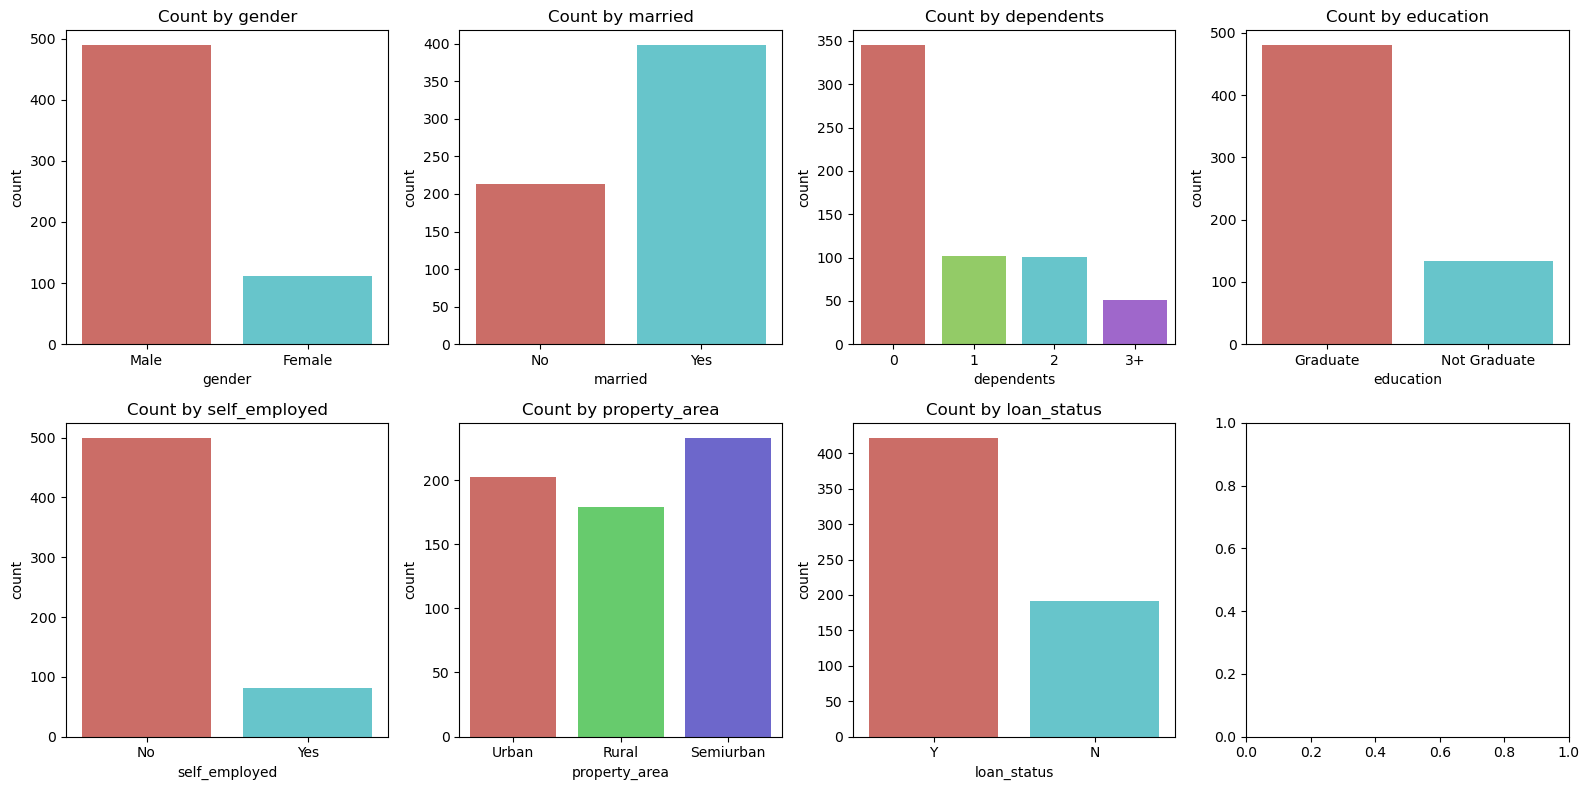

In [615]:
fig, axes = plt.subplots(2, 4, figsize = (16,8))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data = df_loan, x = col, ax = axes[i], palette='hls')
    axes[i].set_title(f"Count by {col}")

plt.tight_layout()
plt.show()

# count of male is 5x times count of female
# count of married is 2x times count of not married
# #_dependents (0) is 3.5x of dependents (1,2,3+)
# #_graduates are 3x times of Not_graduates
# #_salaried class id 5x times of self_employed
# semiurban > urban > rural (rural being lowest)


In [616]:
for i in df_loan[categorical_cols]:
    print(f"{i} : {df_loan[i].value_counts()}")
    print(f"{i} : {df_loan[i].isnull().sum()}")
    print("\n")
    
    percentage_values = df_loan[i].value_counts() * 100 / len(df_loan[i])
    print(f"Percentage of {i} values:\n{percentage_values}\n")
    
    percentage_null_values = df_loan[i].isnull().sum() * 100 / len(df_loan[i])
    print(f"Percentage of Null values in {i}:\n{percentage_null_values}\n")
    
    print("*************************************************************")

# provides information of unique values from each feature 
# "self_employed" feature have highest null perc 
# feature with null value perc are in permissble range, so we have directly use imputation technique like mean/median/mode to fill NaN values

gender : gender
Male      489
Female    112
Name: count, dtype: int64
gender : 13


Percentage of gender values:
gender
Male      79.641694
Female    18.241042
Name: count, dtype: float64

Percentage of Null values in gender:
2.1172638436482085

*************************************************************
married : married
Yes    398
No     213
Name: count, dtype: int64
married : 3


Percentage of married values:
married
Yes    64.820847
No     34.690554
Name: count, dtype: float64

Percentage of Null values in married:
0.48859934853420195

*************************************************************
dependents : dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
dependents : 15


Percentage of dependents values:
dependents
0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: count, dtype: float64

Percentage of Null values in dependents:
2.44299674267101

*************************************************************
education : education
Gr

## 3.2 Numerical Analysis   

In [617]:
df_loan.columns
numerical_df = df_loan[['applicantincome', 'coapplicantincome','loanamount','loan_amount_term']]
numerical_df

,applicantincome,coapplicantincome,loanamount,loan_amount_term
0,58490,0,0,360.0
1,45830,15080,1280000,360.0
2,30000,0,660000,360.0
3,25830,23580,1200000,360.0
4,60000,0,1410000,360.0
...,...,...,...,...
609,29000,0,710000,360.0
610,41060,0,400000,180.0
611,80720,2400,2530000,360.0
612,75830,0,1870000,360.0


C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

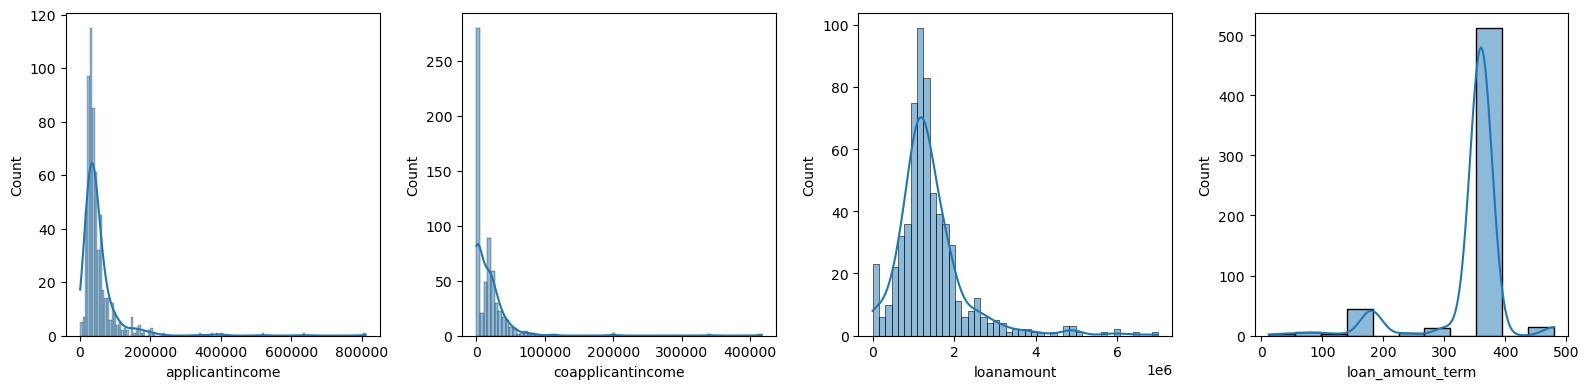

In [618]:
fig, axes = plt.subplots(1,4, figsize = (16,4))
axes = axes.flatten()

for i, col in enumerate(numerical_df):
    sns.histplot(data = df_loan, x = col, kde = True, ax = axes[i])

plt.tight_layout()
plt.show()


# - The distribution of `ApplicantIncome` is right-skewed, which is expected because higher income levels are less common among individuals.
# - The distribution of `Co-ApplicantIncome` is also right-skewed, as it's typical for fewer individuals to have higher co-applicant incomes.
# - The distribution of `LoanAmount` is left-skewed, which makes sense since fewer individuals take out loans of larger amounts.
# - The distribution of `Loan_Amount_Term` is left-skewed, as most individuals tend to prefer longer loan repayment terms.

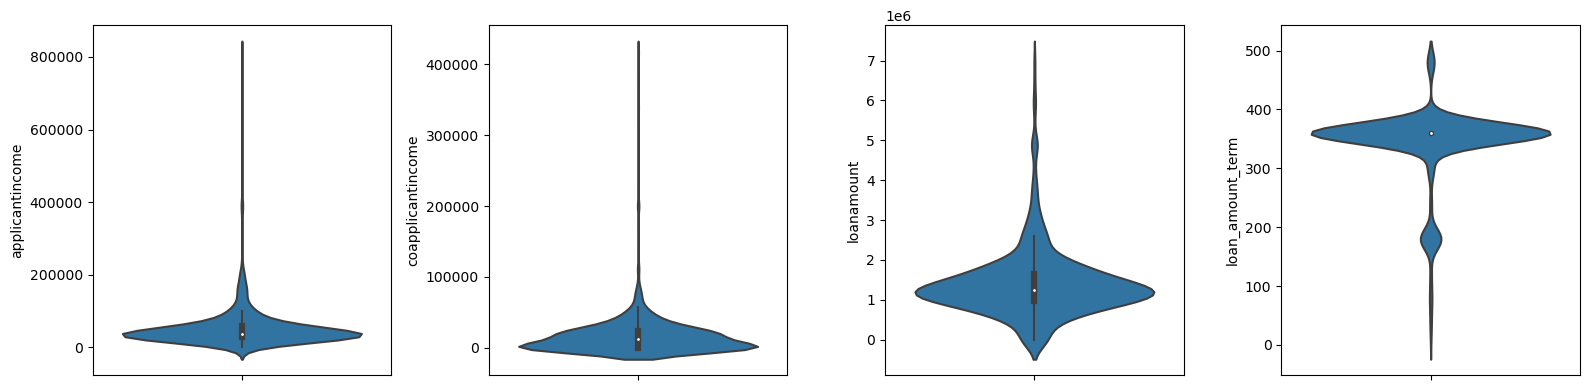

In [619]:
fig, axes = plt.subplots(1,4, figsize = (16,4))
axes = axes.flatten()

for i, col in enumerate(numerical_df):
    sns.violinplot(data = df_loan, y = col, kde = True, ax = axes[i])

plt.tight_layout()
plt.show()

# Need to validat the data again, seems there are few outliers, because few values seems out Range & Measure of central tendency

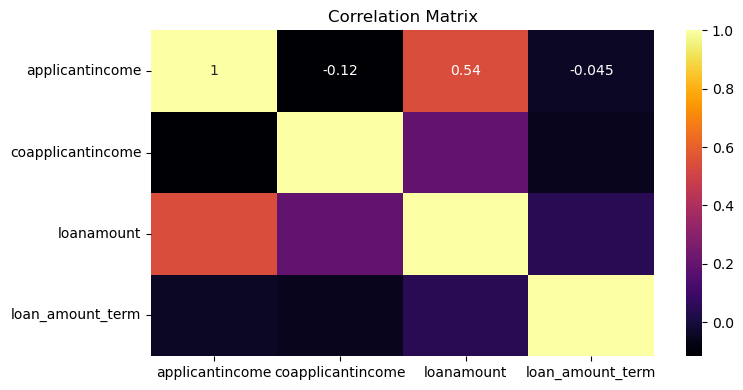

In [620]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize = (8,4))
sns.heatmap(data = correlation_matrix, annot= True,  fmt='.2g', cmap='inferno')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# - `LoanAmount` and `ApplicantIncome` show a positive correlation.
# - Values near 1 suggest a positive correlation, indicating that as Feature 1 increases, Feature 2 also increases, meaning they are directly proportional.
# - Values near -1 indicate a negative correlation, meaning that as Feature 1 increases, Feature 2 decreases, demonstrating an inverse relationship.

## 3.3 Categorical to Categorical Analysis

In [621]:
categorical_cols

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')

In [622]:
self_employed_Vs_loanstatus = pd.crosstab(df_loan['self_employed'], df_loan['self_employed'])
self_employed_Vs_loanstatus

self_employed,No,Yes
self_employed,,
No,500,0
Yes,0,82


In [624]:
gender_Vs_married = pd.crosstab(df_loan['gender'], df_loan['married'])
gender_Vs_married

married,No,Yes
gender,,
Female,80,31
Male,130,357


In [625]:
property_area_Vs_loanstatus = pd.crosstab(df_loan['property_area'], df_loan['loan_status'])
property_area_Vs_loanstatus

loan_status,N,Y
property_area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


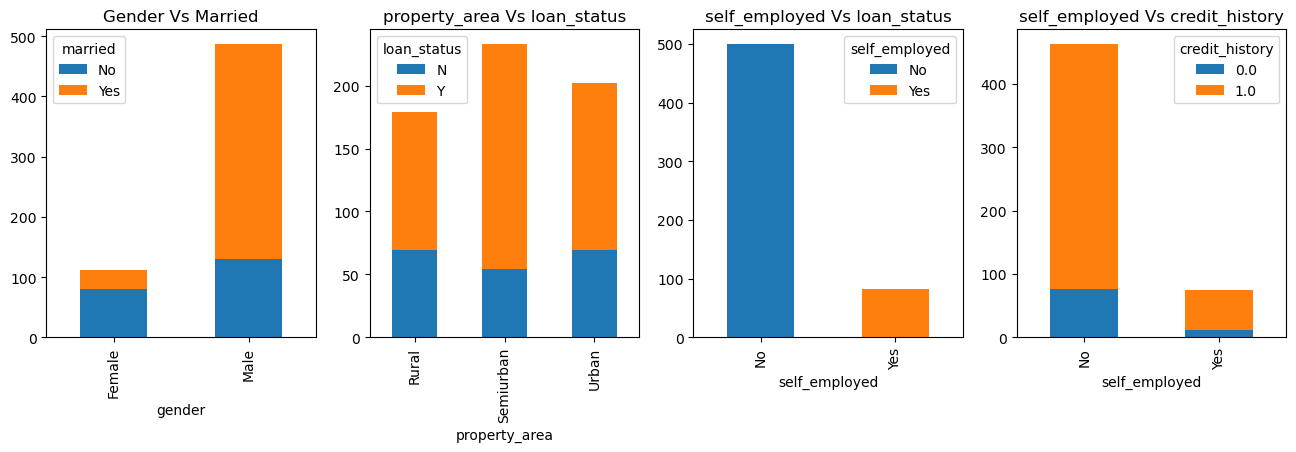

In [626]:
fig, axes = plt.subplots(1,4,figsize = (16,4))

pd.crosstab(df_loan['gender'], df_loan['married']).plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_title("Gender Vs Married")

pd.crosstab(df_loan['property_area'], df_loan['loan_status']).plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_title("property_area Vs loan_status")

pd.crosstab(df_loan['self_employed'], df_loan['self_employed']).plot(kind = 'bar', stacked = True, ax = axes[2])
axes[2].set_title("self_employed Vs loan_status")

pd.crosstab(df_loan['self_employed'], df_loan['credit_history']).plot(kind = 'bar', stacked = True, ax = axes[3])
axes[3].set_title("self_employed Vs credit_history")


plt.show()

# male_married higher class
# semiurban area has highest approved loan_status
# salary class has highest loan_status
# salary class has good credit_history compared with self_employed

## 3.4 Categorical to Numerical

In [627]:
print(f"categoical_cols: {categorical_cols}"), print(f"numerical_cols: {numerical_df.columns}")

categoical_cols: Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')
numerical_cols: Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term'],
      dtype='object')


(None, None)

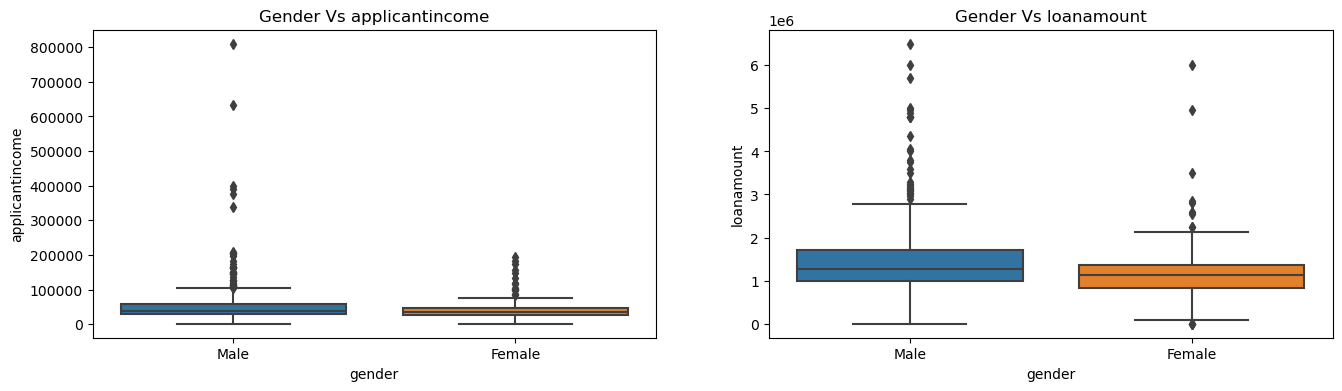

In [628]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'gender', y ='applicantincome', ax = axes[0])
axes[0].set_title("Gender Vs applicantincome")
sns.boxplot(data = df_loan, x = 'gender', y ='loanamount', ax = axes[1])
axes[1].set_title("Gender Vs loanamount")

plt.show()

# applicant income male > applicant income female
# loan amt of male almost same has loan_amt female (loan_amt doesnt depend of gender)

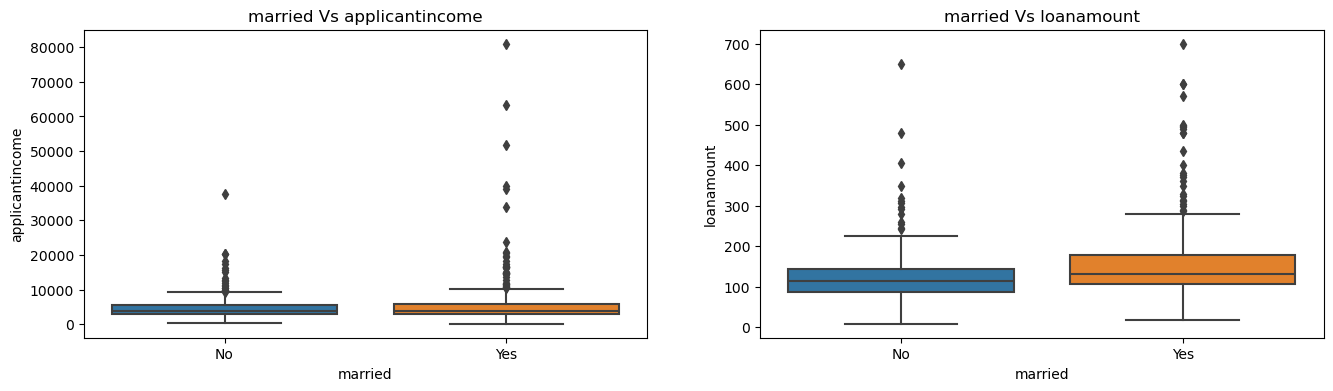

In [183]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'married', y ='applicantincome', ax = axes[0])
axes[0].set_title("married Vs applicantincome")
sns.boxplot(data = df_loan, x = 'married', y ='loanamount', ax = axes[1])
axes[1].set_title("married Vs loanamount")

plt.show()

# married_class indivuals have higher learning rate compared to Not_married_class
# married taked higher amt loan comapred with Not_married_class

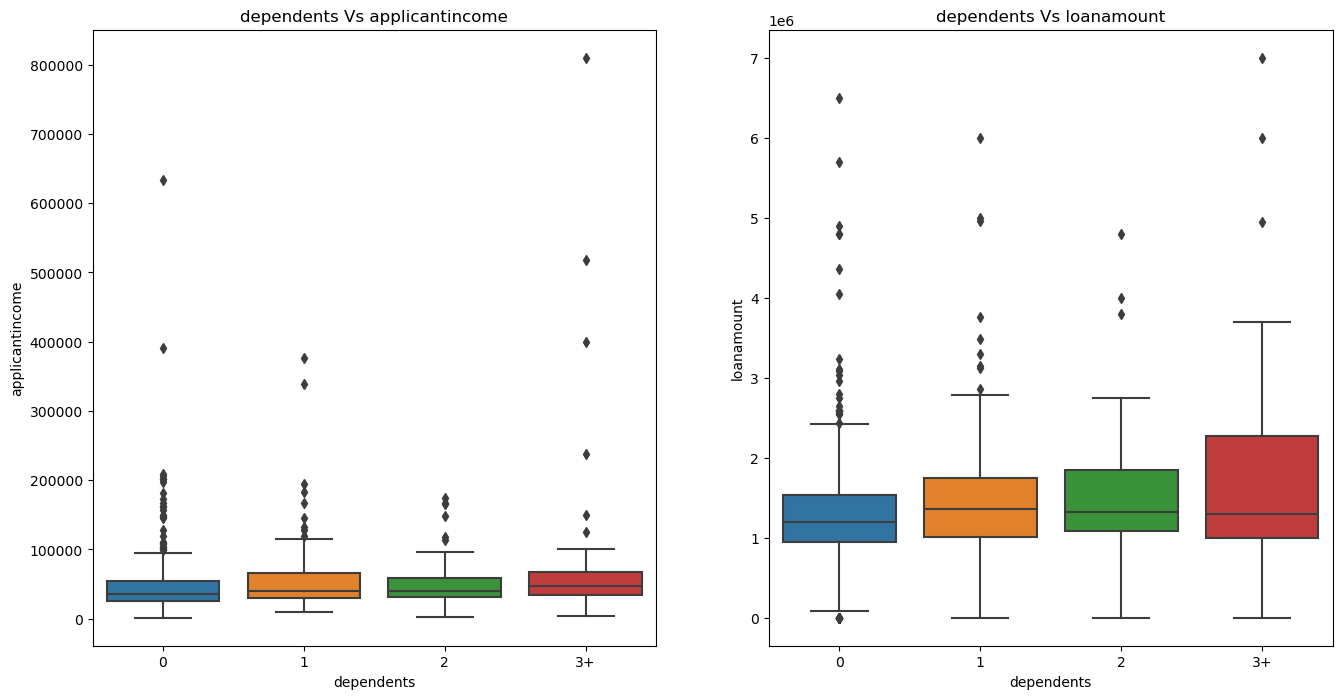

In [629]:
fig, axes = plt.subplots(1,2,figsize = (16,8))

sns.boxplot(data = df_loan, x = 'dependents', y ='applicantincome', ax = axes[0])
axes[0].set_title("dependents Vs applicantincome")
sns.boxplot(data = df_loan, x = 'dependents', y ='loanamount', ax = axes[1])
axes[1].set_title("dependents Vs loanamount")

plt.show()

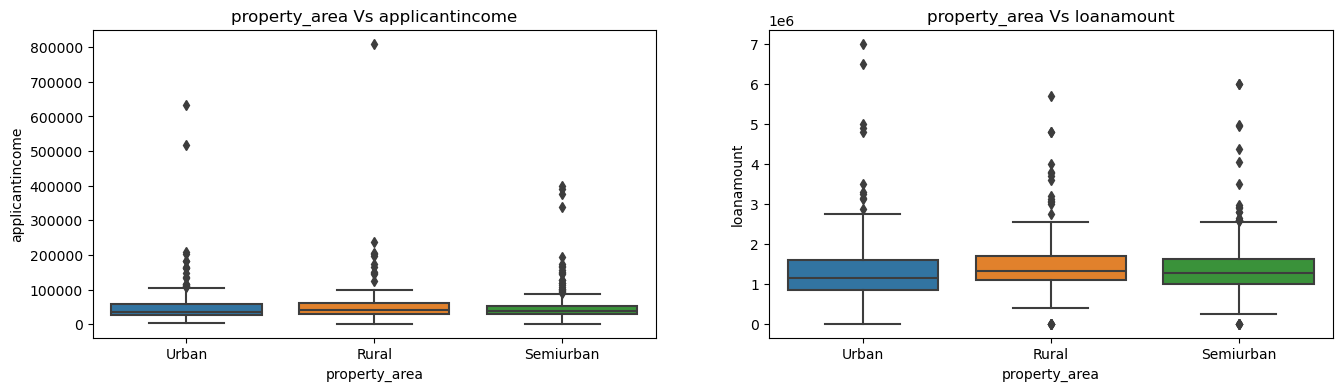

In [630]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'property_area', y ='applicantincome', ax = axes[0])
axes[0].set_title("property_area Vs applicantincome")
sns.boxplot(data = df_loan, x = 'property_area', y ='loanamount', ax = axes[1])
axes[1].set_title("property_area Vs loanamount")

plt.show()

# income_levl of semi-urban & urban almost in same range
# avg_loan_amt of rural_class is higher than semiurban & urban (rural > semi_urban > urban) 

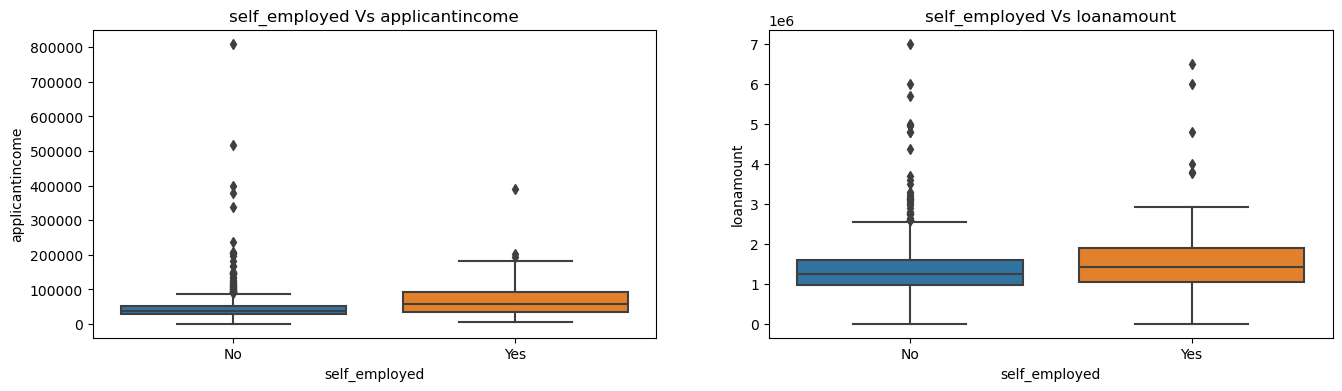

In [631]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'self_employed', y ='applicantincome', ax = axes[0])
axes[0].set_title("self_employed Vs applicantincome")
sns.boxplot(data = df_loan, x = 'self_employed', y ='loanamount', ax = axes[1])
axes[1].set_title("self_employed Vs loanamount")

plt.show()

# avg self_employed applicant_income higher than Not_self_employed class
# avg self_employed takes higher loan_amt comapred to Not_self_employed class

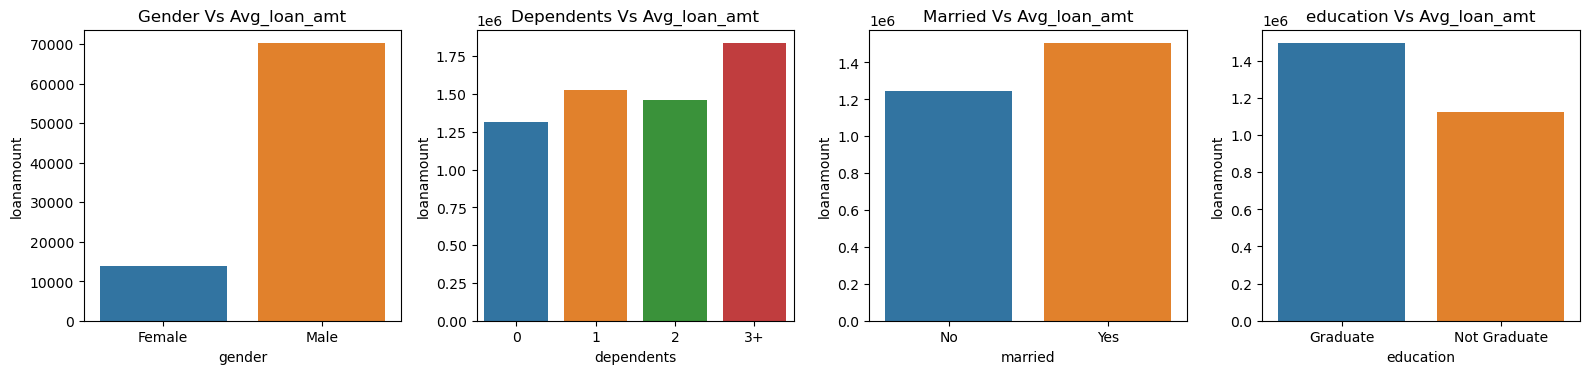

In [632]:
fig, axes = plt.subplots(1,4,figsize = (16,4))
# plt.figure(figsize = (16,8))

axes = axes.flatten()

gender_to_loan_amt = pd.DataFrame(df_loan.groupby(by='gender')['loanamount'].mean()).reset_index()
sns.barplot(x='gender', y='loanamount', data=gender_loan_amt, ax = axes[0])
axes[0].set_title('Gender Vs Avg_loan_amt')

dependents_to_loan_amt = pd.DataFrame(df_loan.groupby(by = 'dependents')['loanamount'].mean()).reset_index()
sns.barplot(x='dependents', y='loanamount', data=dependents_to_loan_amt, ax = axes[1])
axes[1].set_title('Dependents Vs Avg_loan_amt')

married_to_loan_amt = pd.DataFrame(df_loan.groupby(by = 'married')['loanamount'].mean()).reset_index()
sns.barplot(data = married_to_loan_amt, x = 'married', y = 'loanamount', ax = axes[2])
axes[2].set_title('Married Vs Avg_loan_amt')

education_to_loan_amt = pd.DataFrame(df_loan.groupby(by = 'education')['loanamount'].mean()).reset_index()
sns.barplot(data = education_to_loan_amt, x = 'education', y = 'loanamount', ax = axes[3])
axes[3].set_title('education Vs Avg_loan_amt')


plt.tight_layout()
plt.show()


# Avg_loan_amount taken by males > female
# Avg_loan_amount taken by 3+ dependents > compared with others
# Avg_loan_amount taken by married > non-married
# Avg_loan_amount taken by graduates > not graduate

# 4. Data Preprocessing 

## 4.1 Data Imputation

In [633]:
df_loan.shape

(614, 12)

In [634]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             601 non-null    object 
 1   married            611 non-null    object 
 2   dependents         599 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      582 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    int64  
 7   loanamount         614 non-null    int64  
 8   loan_amount_term   600 non-null    float64
 9   credit_history     564 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 57.7+ KB


## 4.1.1 imputation for categorical variables

In [635]:
df_loan['gender'].fillna(df_loan['gender'].mode()[0], inplace = True)

In [636]:
df_loan['married'].fillna(df_loan['married'].mode()[0], inplace=True)
df_loan['dependents'].fillna(df_loan['dependents'].mode()[0], inplace=True)
df_loan['self_employed'].fillna(df_loan['self_employed'].mode()[0], inplace=True)
df_loan['credit_history'].fillna(df_loan['self_employed'].mode()[0], inplace=True)
df_loan['loan_amount_term'].fillna(df_loan['loan_amount_term'].mode()[0], inplace=True)

C:\Users\aravit01\AppData\Local\Temp\ipykernel_23556\1111594445.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_loan['credit_history'].fillna(df_loan['self_employed'].mode()[0], inplace=True)


## 4.1.2 imputation for numerical variables

In [639]:
df_loan['loanamount'].fillna(df_loan['loanamount'].mean(), inplace=True)

In [640]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    int64  
 7   loanamount         614 non-null    int64  
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    object 
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 57.7+ KB


## 4.2 Outliers treatment using IQR

In [641]:
df_loan.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,58490,0,0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,45830,15080,1280000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,30000,0,660000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,25830,23580,1200000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,60000,0,1410000,360.0,1.0,Urban,Y


In [681]:
df_loan['credit_history'] = df_loan['credit_history'].replace('No',0)

In [684]:
df_loan['credit_history'] = df_loan['credit_history'].astype('str')

In [664]:
df_loan.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term
count,614.000000,614.000000,6.140000e+02,614.000000
mean,54034.592834,16212.457655,1.411661e+06,342.410423
std,61090.416734,29262.483871,8.834063e+05,64.428629
min,1500.000000,0.000000,0.000000e+00,12.000000
25%,28775.000000,0.000000,9.800000e+05,360.000000
50%,38125.000000,11885.000000,1.250000e+06,360.000000
75%,57950.000000,22972.500000,1.647500e+06,360.000000
max,810000.000000,416670.000000,7.000000e+06,480.000000


In [643]:
def calculate_IQR(col):
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return upper_bound, lower_bound 


In [665]:
calculate_IQR(df_loan['applicantincome'])

(101712.5, -14987.5)

In [666]:
df_loan[df_loan['applicantincome'] < calculate_IQR(df_loan['applicantincome'])[1]].shape
df_loan[df_loan['applicantincome'] > calculate_IQR(df_loan['applicantincome'])[0]].shape

# 50 rows of data is greater than upper bound
# 0 rows of data is less than lower bound

(50, 12)

In [667]:
calculate_IQR(df_loan['coapplicantincome'])

(57431.25, -34458.75)

In [647]:
df_loan[df_loan['coapplicantincome'] > calculate_IQR(df_loan['coapplicantincome'])[0]].shape
df_loan[df_loan['coapplicantincome'] < calculate_IQR(df_loan['coapplicantincome'])[1]].shape

# 18 rows of data is greater than upper bound
# 0 rows of data is less than lower bound

(0, 12)

In [648]:
calculate_IQR(df_loan['loanamount'])
calculate_IQR(df_loan['loanamount'])[0]

2648750.0

In [649]:
df_loan[df_loan['loanamount'] < calculate_IQR(df_loan['loanamount'])[1]].shape
df_loan[df_loan['loanamount'] > calculate_IQR(df_loan['loanamount'])[0]].shape

# 41 rows of data is greater than upper bound
# 0 rows of data is less than lower bound

(41, 12)

In [650]:
outlier_threshold = df_loan[df_loan['loanamount'] > calculate_IQR(df_loan['loanamount'])[0]].shape
outlier_threshold

# loan_amt > 261.5 is considered as outlier removed from existing df

(41, 12)

In [668]:
df_loan_new = df_loan[df_loan['loanamount'] < calculate_IQR(df_loan['loanamount'])[0]]

In [669]:
df_loan_new.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term
count,573.000000,573.000000,5.730000e+02,573.000000
mean,46499.005236,14787.293194,1.235689e+06,342.408377
std,36488.487344,23486.647597,5.255065e+05,64.856437
min,1500.000000,0.000000,0.000000e+00,12.000000
25%,27690.000000,0.000000,9.600000e+05,360.000000
50%,36910.000000,12100.000000,1.200000e+06,360.000000
75%,52500.000000,22230.000000,1.550000e+06,360.000000
max,391470.000000,338370.000000,2.600000e+06,480.000000


In [670]:
df_loan_new.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,58490,0,0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,45830,15080,1280000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,30000,0,660000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,25830,23580,1200000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,60000,0,1410000,360.0,1.0,Urban,Y


In [671]:
df_loan_new.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [685]:
cols_to_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area', 'loan_status']

for i in cols_to_encode:
    print(f"{i} : {df_loan_new[i].unique()}")

gender : ['Male' 'Female']
married : ['No' 'Yes']
dependents : ['0' '1' '3+' '2']
education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes']
credit_history : ['1.0' '0.0']
property_area : ['Urban' 'Rural' 'Semiurban']
loan_status : ['Y' 'N']


## 4.3 Label Encoding for Ordinal features

In [691]:
df_loan_new['dependents'] = df_loan_new['dependents'].map({
    '0': 1,
    '1': 2,
    '2': 3,
    '3+': 4})

C:\Users\aravit01\AppData\Local\Temp\ipykernel_23556\1547376661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_new['dependents'] = df_loan_new['dependents'].map({


In [692]:
df_loan_new['property_area'] = df_loan_new['property_area'].map({
    'Rural': 1,
    'Semiurban': 2,
    'Urban': 3})

C:\Users\aravit01\AppData\Local\Temp\ipykernel_23556\1074348104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_new['property_area'] = df_loan_new['property_area'].map({


In [693]:
cols_to_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area', 'loan_status']

for i in cols_to_encode:
    print(f"{i} : {df_loan_new[i].unique()}")

gender : ['Male' 'Female']
married : ['No' 'Yes']
dependents : [1 2 4 3]
education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes']
credit_history : ['1.0' '0.0']
property_area : [3 1 2]
loan_status : ['Y' 'N']


## 4.4 One Hot Encoding for Nominal features

In [694]:
cols_to_OHE = ['gender', 'married', 'education', 'self_employed', 'credit_history',  'loan_status']

df_loan_encoded = pd.get_dummies(data = df_loan_new, columns=cols_to_OHE, drop_first=True, dtype='int32')
df_loan_encoded.head()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,property_area,gender_Male,married_Yes,education_Not Graduate,self_employed_Yes,credit_history_1.0,loan_status_Y
0,1,58490,0,0,360.0,3,1,0,0,0,1,1
1,2,45830,15080,1280000,360.0,1,1,1,0,0,1,0
2,1,30000,0,660000,360.0,3,1,1,0,1,1,1
3,1,25830,23580,1200000,360.0,3,1,1,1,0,1,1
4,1,60000,0,1410000,360.0,3,1,0,0,0,1,1


In [695]:
df_loan_encoded.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'property_area', 'gender_Male', 'married_Yes',
       'education_Not Graduate', 'self_employed_Yes', 'credit_history_1.0',
       'loan_status_Y'],
      dtype='object')

In [696]:
new_cols_names = {'gender_Male': 'gender',
                 'married_Yes':'married',
                 'education_Not Graduate': 'education',
                 'self_employed_Yes': 'self_employed',
                 'credit_history_1': 'credit_history',
                 'loan_status_Y': 'loan_status'}
df_loan_encoded.rename(columns = new_cols_names, inplace = True)

# renamed cols to original col names after encoding

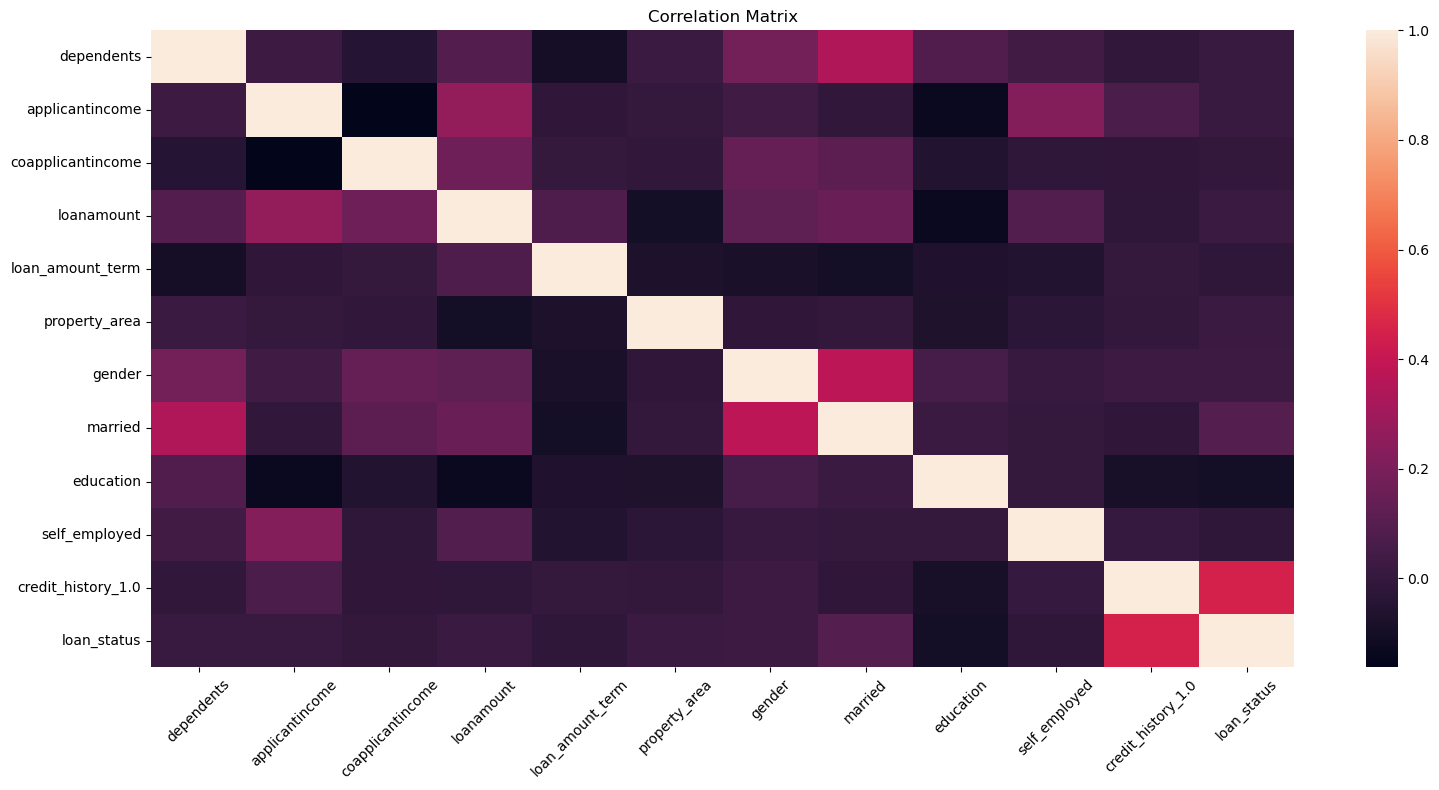

In [697]:
correlation_matrix_after_OHE = df_loan_encoded.corr()

plt.figure(figsize = (16,8))
sns.heatmap(data = correlation_matrix_after_OHE)
plt.title('Correlation Matrix')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# features with postive correlation
# applicant_income & loan_amt
# credit_history & loan_status
# graduate & applicant_income

## 4.5 Skewness Treatment

C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

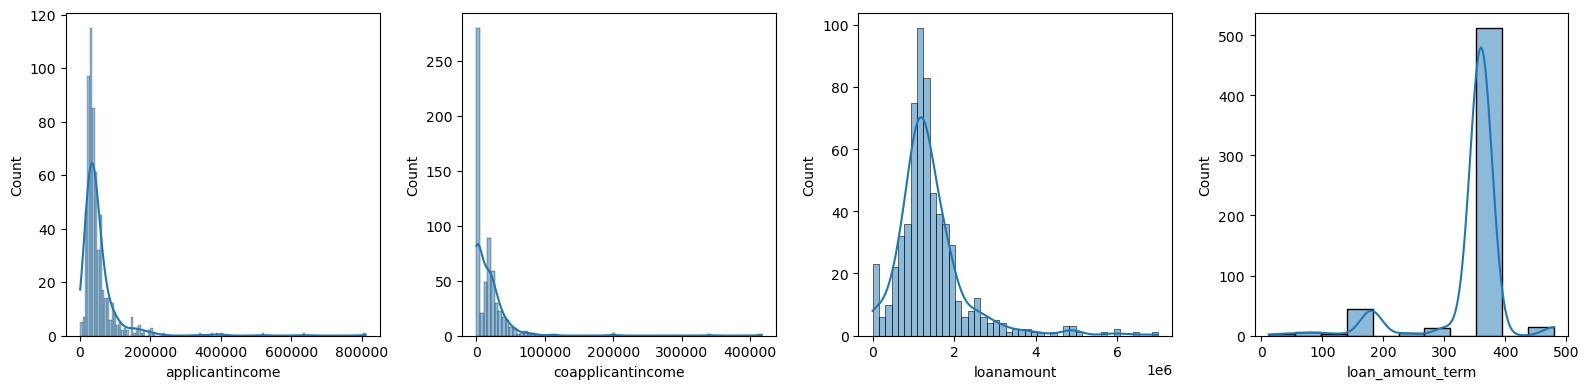

In [698]:
fig, axes = plt.subplots(1,4, figsize = (16,4))
axes = axes.flatten()

for i, col in enumerate(numerical_df):
    sns.histplot(data = df_loan, x = col, kde = True, ax = axes[i])

plt.tight_layout()
plt.show()

In [699]:
df_loan_encoded['applicantincome'] = np.sqrt(df_loan_encoded['applicantincome']) 
df_loan_encoded['coapplicantincome'] = np.sqrt(df_loan_encoded['coapplicantincome'])
df_loan_encoded['loanamount'] = np.sqrt(df_loan_encoded['loanamount'])
df_loan_encoded['loan_amount_term'] = np.sqrt(df_loan_encoded['loan_amount_term'])

C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

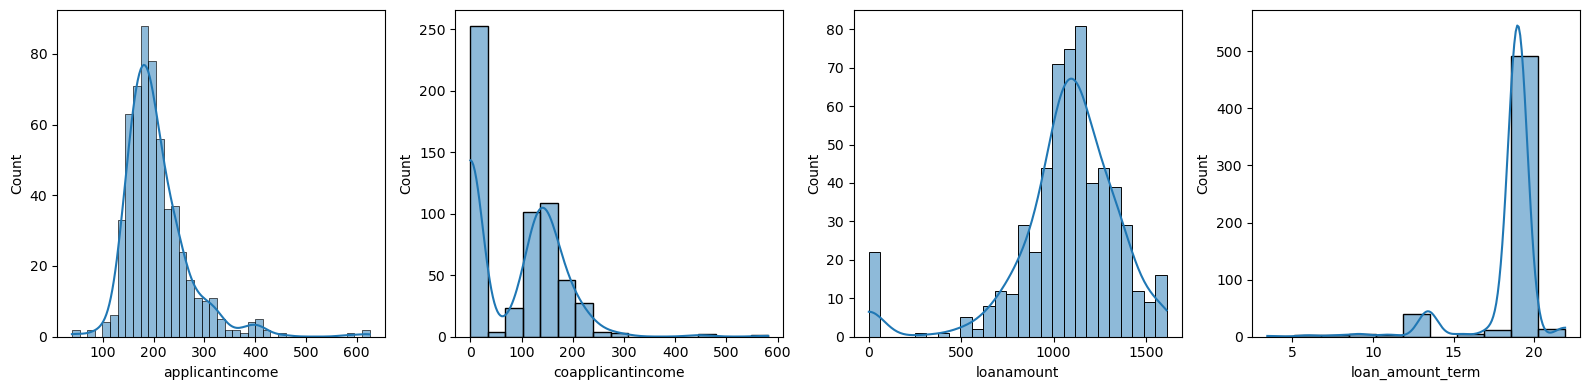

In [700]:

fig, axes = plt.subplots(1,4, figsize = (16,4))
axes = axes.flatten()

for i, col in enumerate(numerical_df):
    sns.histplot(data = df_loan_encoded, x = col, kde = True, ax = axes[i])

plt.tight_layout()
plt.show()

# after applying "square_root_transformation numerical feature converted to normal distribution

In [701]:
df_loan_encoded.head()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,property_area,gender,married,education,self_employed,credit_history_1.0,loan_status
0,1,241.847059,0.000000,0.000000,18.973666,3,1,0,0,0,1,1
1,2,214.079425,122.800651,1131.370850,18.973666,1,1,1,0,0,1,0
2,1,173.205081,0.000000,812.403840,18.973666,3,1,1,0,1,1,1
3,1,160.717143,153.557807,1095.445115,18.973666,3,1,1,1,0,1,1
4,1,244.948974,0.000000,1187.434209,18.973666,3,1,0,0,0,1,1


In [702]:
df2 = df_loan_encoded.copy(deep = True)
df2.shape

# we have copied encoded dataframe to new df which is "df2"
# going forward for model training & model evaluation we will be using df2
# this step is implementated for simiplicity, we can skip 

(573, 12)

In [703]:
df2.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,property_area,gender,married,education,self_employed,credit_history_1.0,loan_status
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.00000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,1.705061,205.942710,86.119107,1070.475064,18.379403,2.04014,0.813264,0.645724,0.232112,0.127400,0.774869,0.692845
std,0.981610,63.982420,85.928334,299.882372,2.148016,0.78455,0.390040,0.478711,0.422549,0.333711,0.418033,0.461717
min,1.000000,38.729833,0.000000,0.000000,3.464102,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,166.403125,0.000000,979.795897,18.973666,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,192.119754,110.000000,1095.445115,18.973666,2.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,229.128785,149.097284,1244.989960,18.973666,3.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,625.675635,581.695797,1612.451550,21.908902,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5 Feature Separation

In [704]:
X = df2.drop('loan_status', axis =1)
y = df2['loan_status']


# dataframe is splitted into independent variables(X) & dependent variables(y)
# check for shape of dependent variables(y), if there is class imbalance, needs to be treatement with certain technique's

In [705]:
X.shape, y.shape

((573, 11), (573,))

In [706]:
y.value_counts()

# there is clear class imbalance in dependent variable
# we use SMOTE technique to handle class imbalance

loan_status
1    397
0    176
Name: count, dtype: int64

In [707]:
technique = SMOTE
X_os,y_os = technique().fit_resample(X, y)

# X_os means over_sampling
# y_os means over_sampling

In [708]:
y_os.value_counts()

# now we able to observe the class_imbalance is treated
# berfore --> 0 --> 176
# after --> 0 --> 397

loan_status
1    397
0    397
Name: count, dtype: int64

In [709]:
X_os.shape

(794, 11)

# 6 Data Scaling
## 6.1 Min Max Scaler

In [710]:
X_os.head()

# before data scaling


,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,property_area,gender,married,education,self_employed,credit_history_1.0
0,1,241.847059,0.000000,0.000000,18.973666,3,1,0,0,0,1
1,2,214.079425,122.800651,1131.370850,18.973666,1,1,1,0,0,1
2,1,173.205081,0.000000,812.403840,18.973666,3,1,1,0,1,1
3,1,160.717143,153.557807,1095.445115,18.973666,3,1,1,1,0,1
4,1,244.948974,0.000000,1187.434209,18.973666,3,1,0,0,0,1


In [711]:
X_os.shape

(794, 11)

In [712]:
X_os.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,property_area,gender,married,education,self_employed,credit_history_1.0
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,1.609572,204.006116,82.551848,1051.502089,18.356944,1.972292,0.748111,0.544081,0.192695,0.095718,0.623426
std,0.912963,60.274530,84.680883,325.841931,2.143322,0.785581,0.434372,0.498367,0.394664,0.294389,0.484832
min,1.000000,38.729833,0.000000,0.000000,3.464102,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,166.652865,0.000000,969.535971,18.973666,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,189.749835,101.783896,1095.445115,18.973666,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,223.606798,147.338882,1244.989960,18.973666,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,4.000000,625.675635,581.695797,1612.451550,21.908902,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [713]:
cols_to_scale = ['applicantincome',	'coapplicantincome','loanamount','loan_amount_term']
scaler = MinMaxScaler()
X_os[cols_to_scale] = scaler.fit_transform(X_os[cols_to_scale])

# applicantincome	coapplicantincome	loanamount	loan_amount_term cols needs to be scaled

In [714]:
X_os.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,property_area,gender,married,education,self_employed,credit_history_1.0
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,1.609572,0.281587,0.141916,0.652114,0.807428,1.972292,0.748111,0.544081,0.192695,0.095718,0.623426
std,0.912963,0.102692,0.145576,0.202079,0.116202,0.785581,0.434372,0.498367,0.394664,0.294389,0.484832
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.217947,0.000000,0.601281,0.840864,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.257298,0.174978,0.679366,0.840864,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,0.314981,0.253292,0.772110,0.840864,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [715]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column_names'] = data.columns
    vif_df['VIF'] =  [variance_inflation_factor (data.values, i)for i in range(data.shape[1])]
    return vif_df

In [716]:
calculate_vif(X_os)

,column_names,VIF
0,dependents,4.579960
1,applicantincome,10.618433
2,coapplicantincome,2.781774
3,loanamount,12.960136
4,loan_amount_term,18.497190
5,property_area,6.603961
6,gender,5.096121
7,married,3.146029
8,education,1.281041
9,self_employed,1.176963


# 7. Model split into training & testing dataset

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.33, random_state=42)

In [718]:
X_train.shape, y_test.shape

((531, 11), (263,))

# 8. Models

## 8.1 Logistic Regression with default parameters

In [719]:
model_lr_default = LogisticRegression()
model_lr_default.fit(X_train, y_train)

y_pred_lr_default = model_lr_default.predict(X_test)
model_lr_accuracy_score = accuracy_score(y_pred_lr_default, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_lr_default)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_lr_default)}")
print('\n')
print(f"accuracy_score: \n {model_lr_accuracy_score}")

classification report: 
               precision    recall  f1-score   support

           0       0.87      0.67      0.75       129
           1       0.74      0.90      0.81       134

    accuracy                           0.79       263
   macro avg       0.80      0.78      0.78       263
weighted avg       0.80      0.79      0.78       263

confusion matrix: 
 [[ 86  43]
 [ 13 121]]


accuracy_score: 
 78.70722433460075


## 8.2 Logistic Regression with custom parameters

In [720]:
model_lr_params = LogisticRegression(solver = 'saga', max_iter = 500, random_state = 1)
model_lr_params.fit(X_train, y_train)

y_pred_lr_params = model_lr_params.predict(X_test)

model_lr_params_accuracy_score = accuracy_score(y_pred_lr_params, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_lr_params)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_lr_params)}")
print('\n')
print(f"accuracy_score: \n {model_lr_params_accuracy_score}")

classification report: 
               precision    recall  f1-score   support

           0       0.87      0.67      0.75       129
           1       0.74      0.90      0.81       134

    accuracy                           0.79       263
   macro avg       0.80      0.78      0.78       263
weighted avg       0.80      0.79      0.78       263

confusion matrix: 
 [[ 86  43]
 [ 13 121]]


accuracy_score: 
 78.70722433460075


## 8.3 Support Vector Machine (SVM)

In [721]:
model_svc = SVC(kernel= 'rbf', max_iter=500)
model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)

model_svc_accuracy_score = accuracy_score(y_pred_svc, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_svc)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_svc)}")
print('\n')
print(f"accuracy_score: \n {model_svc_accuracy_score}")

classification report: 
               precision    recall  f1-score   support

           0       0.90      0.63      0.74       129
           1       0.72      0.93      0.81       134

    accuracy                           0.78       263
   macro avg       0.81      0.78      0.78       263
weighted avg       0.81      0.78      0.78       263

confusion matrix: 
 [[ 81  48]
 [  9 125]]


accuracy_score: 
 78.32699619771863


C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 8.4 Navie Bayes
### 8.4.1 GaussianNB

In [722]:
model_Gaussian_NB = GaussianNB()
model_Gaussian_NB.fit(X_train, y_train)

y_pred_Gaussian_NB = model_Gaussian_NB.predict(X_test)

model_Gaussian_NB_accuracy_score = accuracy_score(y_pred_Gaussian_NB, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_Gaussian_NB)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_Gaussian_NB)}")
print('\n')
print(f"accuracy_score: \n {model_Gaussian_NB_accuracy_score}")

classification report: 
               precision    recall  f1-score   support

           0       0.79      0.72      0.76       129
           1       0.75      0.82      0.79       134

    accuracy                           0.77       263
   macro avg       0.77      0.77      0.77       263
weighted avg       0.77      0.77      0.77       263

confusion matrix: 
 [[ 93  36]
 [ 24 110]]


accuracy_score: 
 77.18631178707224


# 8.5 Decision Tree

### 8.5.1 Decision tree with criterion = ginni 

In [723]:
model_dt_ginni = DecisionTreeClassifier(criterion='gini',
                                        splitter='best',
                                        max_depth=5,
                                        min_samples_split=2,
                                        min_samples_leaf=1
                                            )
model_dt_ginni.fit(X_train, y_train)

y_pred_dt_ginni = model_dt_ginni.predict(X_test)

model_dt_ginni_accuracy_score = accuracy_score(y_pred_dt_ginni, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_dt_ginni)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_dt_ginni)}")
print('\n')
print(f"accuracy_score: \n {model_dt_ginni_accuracy_score}")

classification report: 
               precision    recall  f1-score   support

           0       0.80      0.63      0.70       129
           1       0.70      0.85      0.77       134

    accuracy                           0.74       263
   macro avg       0.75      0.74      0.74       263
weighted avg       0.75      0.74      0.74       263

confusion matrix: 
 [[ 81  48]
 [ 20 114]]


accuracy_score: 
 74.1444866920152


### 8.5.2 Decision tree with criterion = entropy 

In [724]:
model_dt_entropy = DecisionTreeClassifier(criterion='entropy',
                                        splitter='best',
                                        max_depth=5,
                                        min_samples_split=2,
                                        min_samples_leaf=1
                                            )
model_dt_entropy.fit(X_train, y_train)

y_pred_dt_entropy = model_dt_entropy.predict(X_test)


model_dt_entropy_as = accuracy_score(y_pred_dt_entropy, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_dt_entropy)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_dt_entropy)}")
print('\n')
print(f"accuracy_score: \n {model_dt_entropy_as}")

classification report: 
               precision    recall  f1-score   support

           0       0.83      0.64      0.72       129
           1       0.72      0.87      0.79       134

    accuracy                           0.76       263
   macro avg       0.77      0.76      0.76       263
weighted avg       0.77      0.76      0.76       263

confusion matrix: 
 [[ 83  46]
 [ 17 117]]


accuracy_score: 
 76.04562737642586


### 8.5.3 Decision tree with criterion = ginni & leaf node

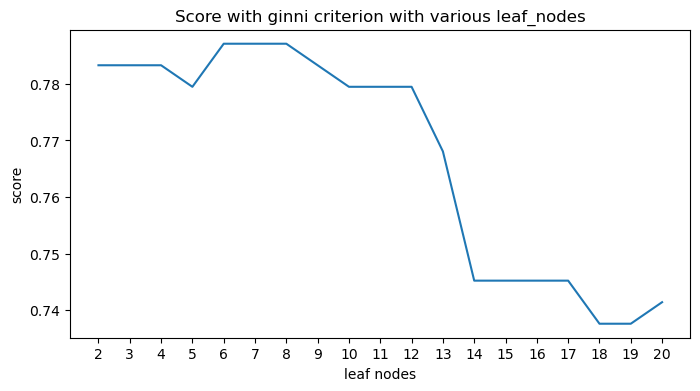



Decision tree with Ginni Criterion, Accuracy Score: 78.70722433460075


In [725]:
score_list = []
for i in range(2,21):
    model_dt_ginni_leafnodes = DecisionTreeClassifier(criterion='gini',
                                            splitter='best',
                                            max_depth=5,
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_leaf_nodes= i
                                                )
    model_dt_ginni_leafnodes.fit(X_train, y_train)
    score_list.append(model_dt_ginni_leafnodes.score(X_test, y_test))


model_dt_ginni_leafnodes_as = max(score_list) * 100

plt.figure(figsize=(8,4))
plt.plot(range(2,21), score_list)
plt.title('Score with ginni criterion with various leaf_nodes')
plt.xticks(np.arange(2,21,1))
plt.xlabel('leaf nodes')
plt.ylabel('score')
plt.show()

print('\n')
print(f"Decision tree with Ginni Criterion, Accuracy Score: {model_dt_ginni_leafnodes_as}")

### 8.5.4 Decision tree with criterion = entropy & leaf node

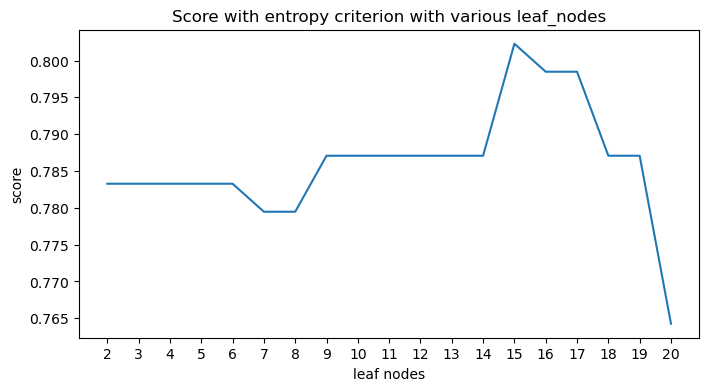



Decision tree with entropy Criterion, Accuracy Score: 80.22813688212928


In [726]:
score_list = []
for i in range(2,21):
    model_dt_entropy_leafnodes = DecisionTreeClassifier(criterion='entropy',
                                            splitter='best',
                                            max_depth=5,
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_leaf_nodes= i
                                                )
    model_dt_entropy_leafnodes.fit(X_train, y_train)
    score_list.append(model_dt_entropy_leafnodes.score(X_test, y_test))


model_dt_entropy_leafnodes_as = max(score_list) * 100

plt.figure(figsize=(8,4))
plt.plot(range(2,21), score_list)
plt.title('Score with entropy criterion with various leaf_nodes')
plt.xticks(np.arange(2,21,1))
plt.xlabel('leaf nodes')
plt.ylabel('score')
plt.show()

print('\n')
print(f"Decision tree with entropy Criterion, Accuracy Score: {model_dt_entropy_leafnodes_as}")

## 8.6 Random Forest

### 8.6.1 Random forest with criterion = ginni

In [727]:
model_rf_ginni = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='sqrt'
                                    )
model_rf_ginni.fit(X_train, y_train)
y_pred_rf_ginni = model_rf_ginni.predict(X_test)

model_rf_ginni_as = accuracy_score(y_pred_rf_ginni, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_rf_ginni)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_rf_ginni)}")
print('\n')
print(f"accuracy_score: \n {model_rf_ginni_as}")

classification report: 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       129
           1       0.77      0.85      0.81       134

    accuracy                           0.79       263
   macro avg       0.80      0.79      0.79       263
weighted avg       0.80      0.79      0.79       263

confusion matrix: 
 [[ 95  34]
 [ 20 114]]


accuracy_score: 
 79.46768060836501


### 8.6.2 Random forest with criterion = ginni & leaf node

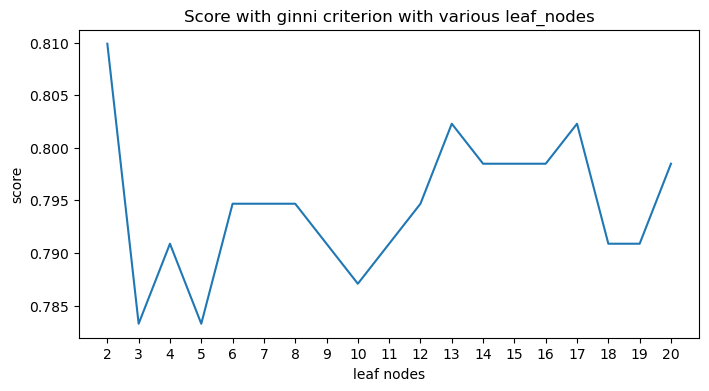



Randome forest with Ginni Criterion, Accuracy Score: 80.22813688212928


In [728]:
score_rf = []
for i in range(2,21):
    model_rf_ginni_leafnode = RandomForestClassifier(n_estimators=100,
                                        criterion='gini',
                                        max_depth=None,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        min_weight_fraction_leaf=0.0,
                                        max_features='sqrt',
                                        max_leaf_nodes= i             
                                        )
    model_rf_ginni_leafnode.fit(X_train, y_train)
    score_rf.append(model_rf_ginni_leafnode.score(X_test, y_test))

model_rf_ginni_leafnode_as = max(score_list) * 100

plt.figure(figsize=(8,4))
plt.plot(range(2,21), score_rf)
plt.title('Score with ginni criterion with various leaf_nodes')
plt.xticks(np.arange(2,21,1))
plt.xlabel('leaf nodes')
plt.ylabel('score')
plt.show()

print('\n')
print(f"Randome forest with Ginni Criterion, Accuracy Score: {model_rf_ginni_leafnode_as}")

### 8.6.3 Random forest with criterion = entropy

In [729]:
model_rf_entropy = RandomForestClassifier(n_estimators=100,
                                    criterion='entropy',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='sqrt'
                                    )
model_rf_entropy.fit(X_train, y_train)
y_pred_rf_entropy = model_rf_entropy.predict(X_test)

model_rf_entropy_as = accuracy_score(y_pred_rf_entropy, y_test) * 100

print(f"classification report: \n {classification_report(y_test, y_pred_rf_entropy)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_rf_entropy)}")
print('\n')
print(f"accuracy_score: \n {model_rf_entropy_as}")

classification report: 
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       129
           1       0.77      0.87      0.82       134

    accuracy                           0.80       263
   macro avg       0.81      0.80      0.80       263
weighted avg       0.81      0.80      0.80       263

confusion matrix: 
 [[ 94  35]
 [ 17 117]]


accuracy_score: 
 80.22813688212928


### 8.6.4 Random forest with criterion = entropy & leaf node

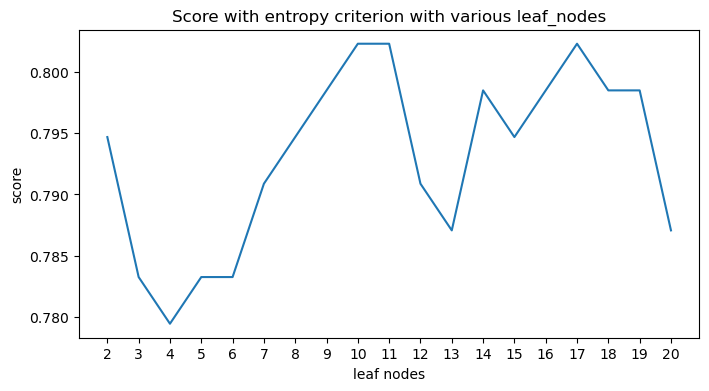



Random forest with Entropy Criterion, Accuracy Score: 80.22813688212928


In [730]:
score_rf = []
for i in range(2,21):
    model_rf_entropy_leafnode = RandomForestClassifier(n_estimators=100,
                                        criterion='entropy',
                                        max_depth=None,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        min_weight_fraction_leaf=0.0,
                                        max_features='sqrt',
                                        max_leaf_nodes= i             
                                        )
    model_rf_entropy_leafnode.fit(X_train, y_train)
    score_rf.append(model_rf_entropy_leafnode.score(X_test, y_test))

model_rf_entropy_leafnode_as = max(score_list) * 100

plt.figure(figsize=(8,4))
plt.plot(range(2,21), score_rf)
plt.title('Score with entropy criterion with various leaf_nodes')
plt.xticks(np.arange(2,21,1))
plt.xlabel('leaf nodes')
plt.ylabel('score')
plt.show()

print('\n')
print(f"Random forest with Entropy Criterion, Accuracy Score: {model_rf_entropy_leafnode_as}")

## 8.6 XGBoost

In [731]:
model_xgb = GradientBoostingClassifier(
                                    learning_rate=0.1,
                                    n_estimators=100,
                                    subsample=1.0,
                                    max_depth=3,
                                    max_leaf_nodes = 10
)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

model_xgb_as = accuracy_score(y_pred_xgb, y_test) * 100


print(f"classification report: \n {classification_report(y_test, y_pred_xgb)}")

print(f"confusion matrix: \n {confusion_matrix(y_test, y_pred_xgb)}")
print('\n')
print(f"accuracy_score: \n {model_xgb_as}")


classification report: 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       129
           1       0.78      0.84      0.81       134

    accuracy                           0.80       263
   macro avg       0.80      0.80      0.80       263
weighted avg       0.80      0.80      0.80       263

confusion matrix: 
 [[ 98  31]
 [ 21 113]]


accuracy_score: 
 80.22813688212928


## 9. Model Comparison 

In [732]:
compare_df = pd.DataFrame({'model': ['logistic Regression with default params',
                     'logistic Regression with default params',
                     'SVM',
                     'Navie Bayes GaussianNB',
                     'Decision Tree ginni',
                     'Decision Tree entropy',
                     'Decision Tree ginni & leaf node',
                     'Decision Tree entropy & leaf node',
                     'Random Forest ginni',
                     'Random Forest ginni & leaf node',
                     'Random Forest entropy',
                     'Random Forest entropy & leaf node',
                     'XG Boost'],
           'Accuracy': [model_lr_accuracy_score,
                       model_lr_params_accuracy_score,
                       model_svc_accuracy_score,
                       model_Gaussian_NB_accuracy_score,
                       model_dt_ginni_accuracy_score,
                       model_dt_entropy_as,
                       model_dt_ginni_leafnodes_as,
                       model_dt_entropy_leafnodes_as,
                       model_rf_ginni_as,
                       model_rf_ginni_leafnode_as,
                       model_rf_entropy_as,
                       model_rf_entropy_leafnode_as,
                       model_xgb_as]
                     })
compare_df.sort_values(by = 'Accuracy', ascending=False)


# based model comparison, best model with accuracy is "Random Forest entropy"
# We will export model file to jiblib or pickel file for reference & depolyment

,model,Accuracy
7,Decision Tree entropy & leaf node,80.228137
9,Random Forest ginni & leaf node,80.228137
10,Random Forest entropy,80.228137
11,Random Forest entropy & leaf node,80.228137
12,XG Boost,80.228137
8,Random Forest ginni,79.467681
0,logistic Regression with default params,78.707224
1,logistic Regression with default params,78.707224
6,Decision Tree ginni & leaf node,78.707224
2,SVM,78.326996


## 10. Model Selection & export to Joblib/pickel file

In [733]:
from joblib import dump

# final model filepath to export
export_file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\Loan default prediction\final_model.joblib")

# final model used
dump(model_rf_entropy_as, export_file_path)

# columns scaled
cols_with_scaled = {
    'scaler_used' : scaler,
    'cols_scaled' : cols_to_scale
    }

# final scaled filepath to export
export_file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\Loan default prediction\final_scaled.joblib")

# final scaled model used
dump(cols_with_scaled, export_file_path)

['C:\\Users\\aravit01\\OneDrive - Kearney\\1. RAVI TEJA\\12. My Learnings\\Portfolio Projects to Showcase\\Loan default prediction\\final_scaled.joblib']